## CUSTOMER CHURN PREDICTION

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier  
import seaborn as sns


DATA=pd.read_csv("Churn_Modelling.csv")
DATA.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Cleaning

In [8]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
DATA.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
DATA.duplicated().sum()

0

In [11]:
DATA.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
DATA.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [13]:
DATA.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


In [14]:
DATA.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
gender_counts = DATA['Gender'].value_counts()
gender_counts

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [16]:
active=DATA['IsActiveMember'].value_counts()

# DATA ANLYSIS

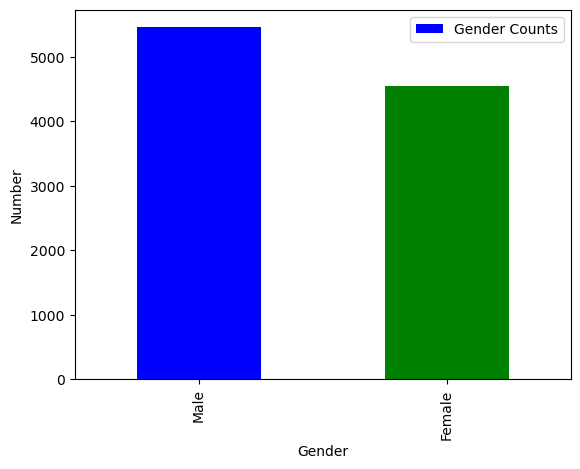

In [17]:
import matplotlib.pyplot as plt

gender_counts.plot(kind='bar', color=['blue', 'green'], label='Gender Counts')


plt.xlabel("Gender")
plt.ylabel("Number")

plt.legend()  
plt.show()


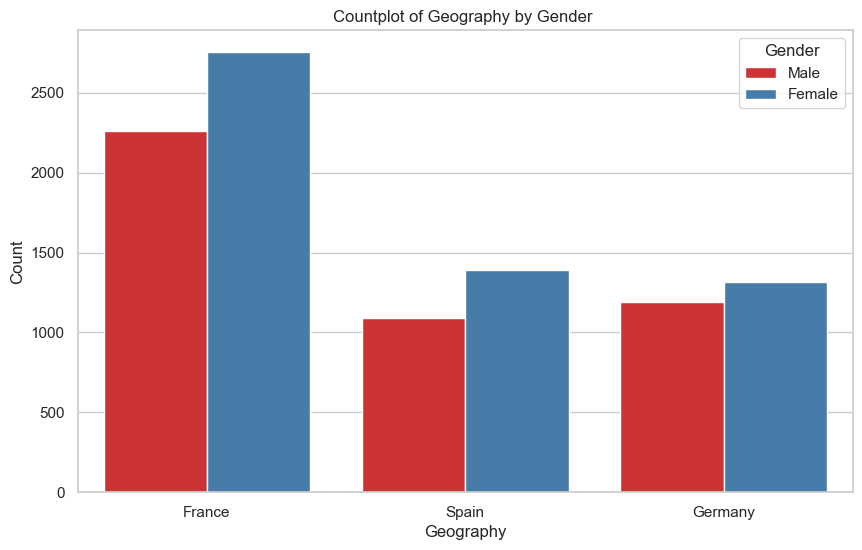

In [18]:
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(x='Geography', hue='Gender', data=DATA, palette="Set1")



plt.xlabel("Geography")
plt.ylabel("Count")
plt.title("Countplot of Geography by Gender ")

plt.legend(title="Gender", labels=["Male", "Female"])
plt.show()


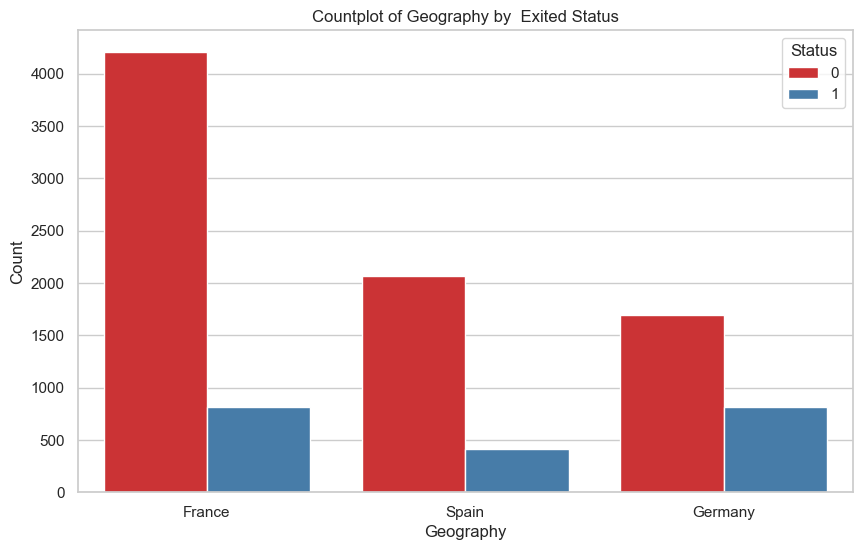

In [19]:

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(x='Geography', hue='Exited', data=DATA, palette="Set1")



plt.xlabel("Geography")
plt.ylabel("Count")
plt.title("Countplot of Geography by  Exited Status")

plt.legend(title="Status",)
plt.show()

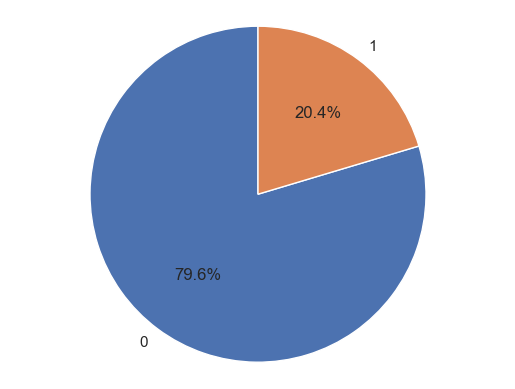

In [20]:

value_counts = DATA['Exited'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  

plt.show()


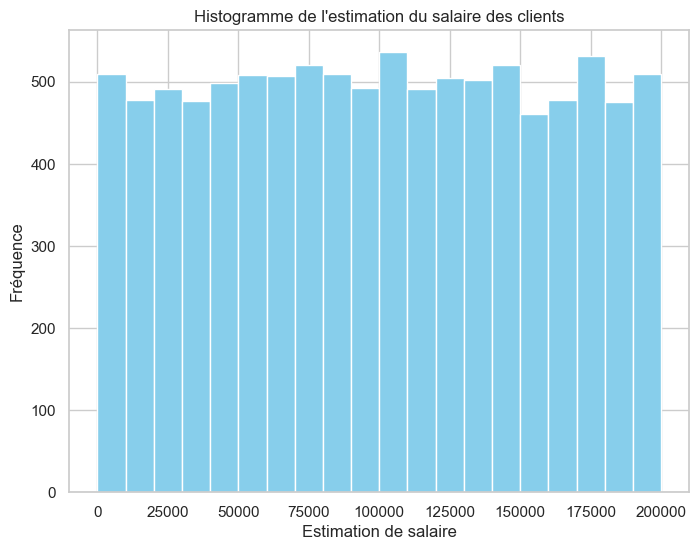

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(DATA['EstimatedSalary'], bins=20, color='skyblue')
plt.title("Histogramme de l'estimation du salaire des clients")
plt.xlabel("Estimation de salaire")
plt.ylabel("Fréquence")
plt.show()

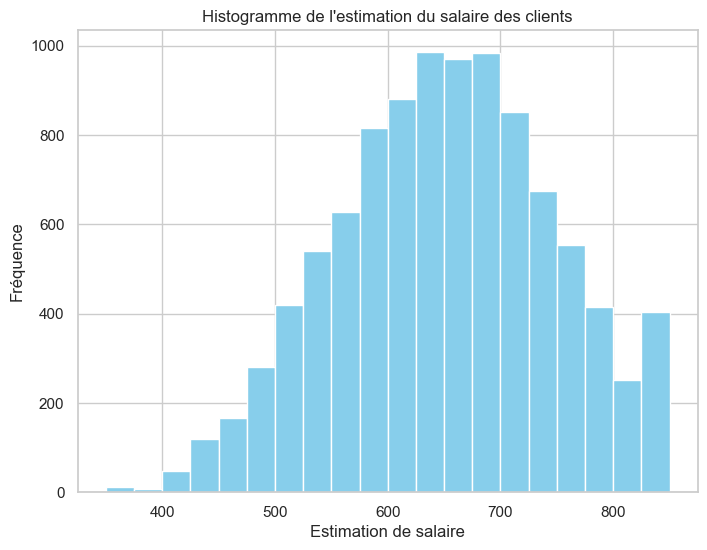

In [22]:
plt.figure(figsize=(8, 6))
plt.hist(DATA['CreditScore'], bins=20, color='skyblue')
plt.title("Histogramme de l'estimation du salaire des clients")
plt.xlabel("Estimation de salaire")
plt.ylabel("Fréquence")
plt.show()

In [23]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [24]:
DATA['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

<Axes: >

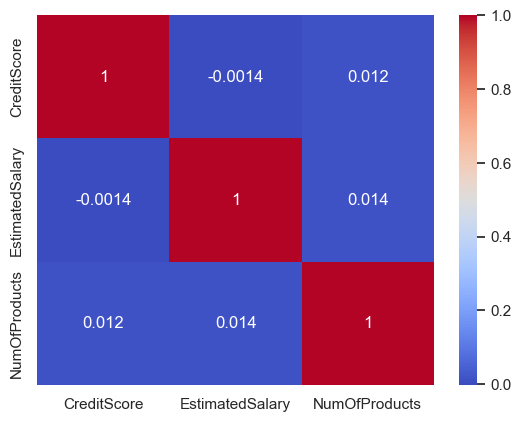

In [25]:
correlation_matrix=DATA[['CreditScore','EstimatedSalary', 'NumOfProducts']].corr()
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")

In [26]:
DATA.head()
DATA.drop(['Gender','Geography'],axis=1,inplace=True)

In [27]:
DATA_CORR=DATA.corr()['Exited'].to_frame()
DATA_CORR


,Exited
CreditScore,-0.027094
Age,0.285323
Tenure,-0.014001
Balance,0.118533
NumOfProducts,-0.047820
HasCrCard,-0.007138
IsActiveMember,-0.156128
EstimatedSalary,0.012097
Exited,1.000000


<Axes: ylabel='Exited'>

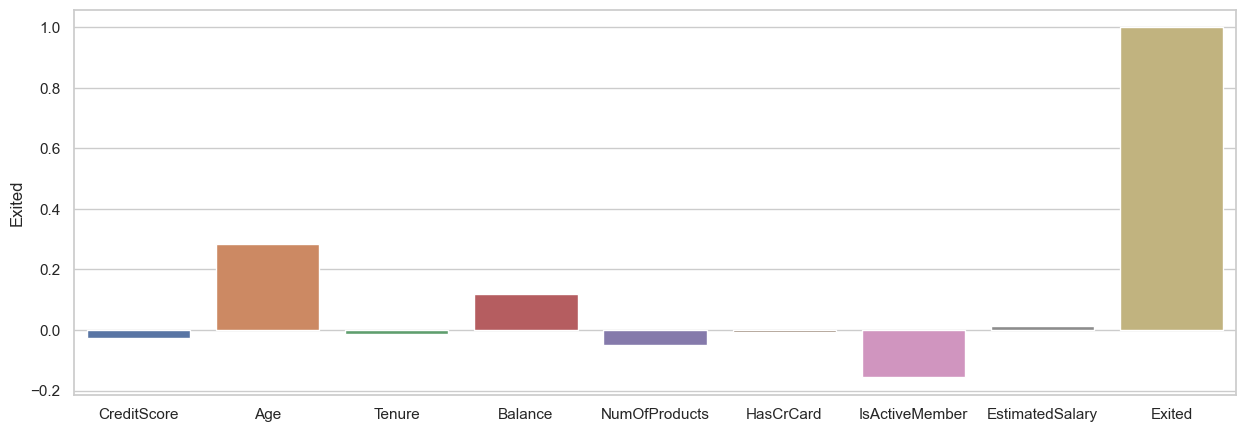

In [79]:
plt.figure(figsize=(15,5))
sns.barplot(data=DATA_CORR,x=DATA_CORR.index,y='Exited')


# SPLITING THE DATA into test and train

In [80]:


X = DATA.drop("Exited", axis=1) 
Y = DATA["Exited"]  


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=12)



# Standart scalling the dataset


In [90]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_scd=sc.transform(X_train)
X_test_scd=sc.transform(X_test)

# MODELING AND EVALUATION


In [91]:
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
5669,648,33,7,135310.41,2,0,1,171668.20
8800,691,37,9,149405.18,1,1,1,146411.60
3205,850,42,8,0.00,1,1,0,19632.64
8731,727,41,10,0.00,2,0,1,47468.56
6412,602,53,5,98268.84,1,0,1,45038.29


In [141]:
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train_scd,Y_train)

LogisticRegression(max_iter=1000)

In [142]:
predictions=lr.predict(X_test_scd)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [162]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score
A=precision_score(Y_test,predictions)
A

0.6915887850467289

In [144]:
recall_score(Y_test,predictions)
accuracy = accuracy_score(Y_test, predictions)
accuracy


0.8025

In [145]:
knn=KNeighborsClassifier(n_neighbors=3)

In [146]:
knn.fit(X_train_scd,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [147]:
predictions2=knn.predict(X_test_scd)
predictions2

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [163]:
B=precision_score(Y_test,predictions2)
B

0.6413373860182371

In [149]:
accuracy2= accuracy_score(Y_test, predictions2)
accuracy2

0.8285

In [150]:

rf = RandomForestClassifier(n_estimators=50, random_state=2)

In [151]:
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
5669,648,33,7,135310.41,2,0,1,171668.20
8800,691,37,9,149405.18,1,1,1,146411.60
3205,850,42,8,0.00,1,1,0,19632.64
8731,727,41,10,0.00,2,0,1,47468.56
6412,602,53,5,98268.84,1,0,1,45038.29


In [152]:
rf.fit(X_train_scd,Y_train)

RandomForestClassifier(n_estimators=50, random_state=2)

In [153]:
predictions3=rf.predict(X_test_scd)

In [154]:
predictions3

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [164]:
C=precision_score(Y_test,predictions3)
C

0.7807692307692308

In [156]:
accuracy3= accuracy_score(Y_test, predictions3)
accuracy3

0.855

In [157]:
gb = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [158]:
gb.fit(X_train_scd,Y_train)

GradientBoostingClassifier(n_estimators=50, random_state=2)

In [159]:
predictions4=rf.predict(X_test_scd)
predictions4

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [165]:
D=precision_score(Y_test,predictions4)
D

0.7807692307692308

we can now observe that the perfect score is for random forest classifier and gradient boosting classifier

In [161]:
accuracy4 = accuracy_score(Y_test, predictions4)
accuracy4

0.855

we can  now do a sample resume to this 

In [166]:
resume = {
    "Méthode": ["LogisticRegression", "KNN", "RandomForest", "GradientBoosting"],
    "ACCRURACY": [accuracy, accuracy2, accuracy3, accuracy4],
    "Precision": [A, B, C,D]
}

data = pd.DataFrame(resume)


In [167]:
data

,Méthode,ACCRURACY,Precision
0,LogisticRegression,0.8025,0.691589
1,KNN,0.8285,0.641337
2,RandomForest,0.8550,0.780769
3,GradientBoosting,0.8550,0.780769
